# The Sparks Foundation
# Task 3: To Explore Unsupervised Machine Learning
## Author:  Mutiur Rehman Khan

## Importing all the required libraries


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import pandas as pd
from sklearn import datasets
import seaborn as sns

## Loading the Dataset


In [6]:
# Load the dataset
irisdata=pd.read_csv("Iris.csv")
iris=datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print("Data imported successfully")
print("Showing the first 5 lines ")
df.head()

Data imported successfully
Showing the first 5 lines 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#class distribution
print(irisdata.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualisation of Data

C:\Users\shan pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shan pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shan pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

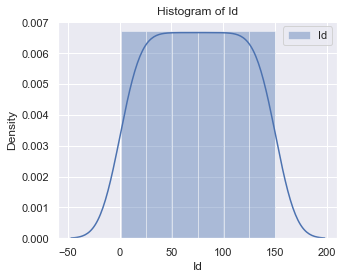

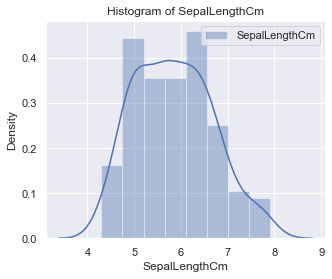

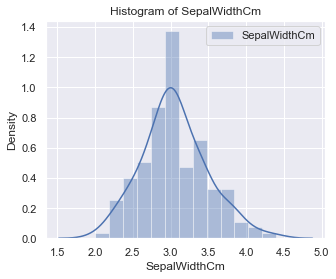

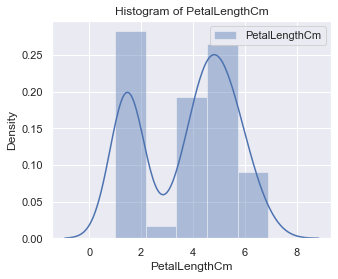

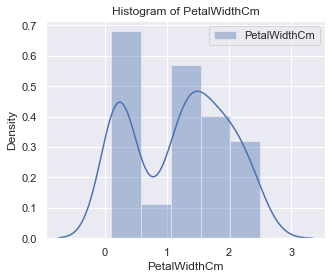

In [10]:
#histogram
col=irisdata.columns[0:-1]
for i in col:
  plt.figure(figsize=(5,4)) # figure ration 16:9
  sns.set()
  sns.distplot(irisdata[i],label=i,color='b')
  plt.title("Histogram of {}".format(i)) # for histogram title
  plt.legend() #for label

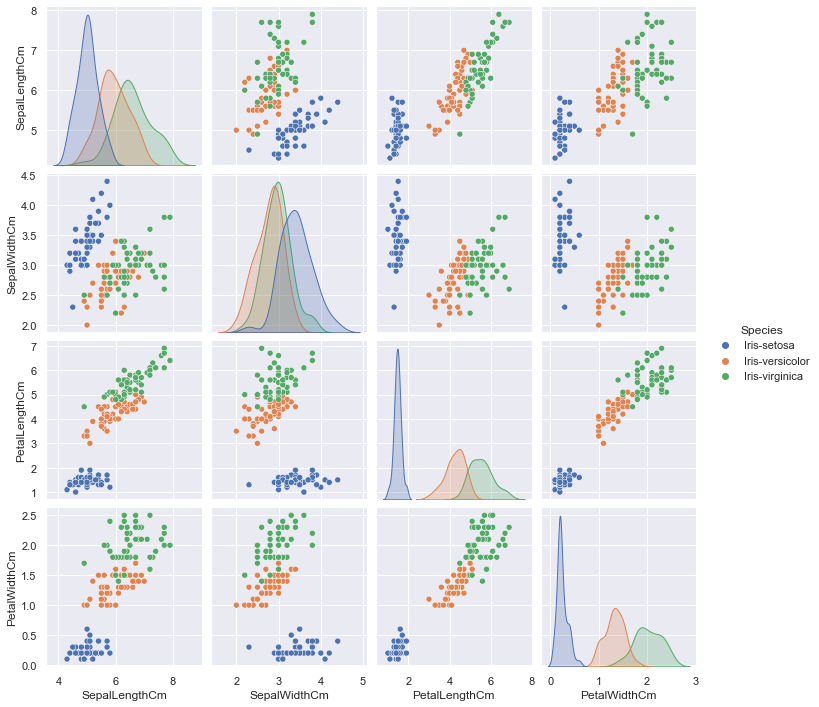

In [13]:
sns.pairplot(irisdata.iloc[:,[1,2,3,4,5]],hue='Species')

## Finding optimal Number of clusters using K means

In [14]:
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
from sklearn.model_selection import train_test_split
arr=irisdata.values
X=arr[:,0:4]
y=arr[:,4]
validation_size=0.20
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=validation_size,random_state=seed)

In [16]:
print(X_train.size)
print(X_test.size)

480
120


In [17]:
irisdata['Species'] = pd.Categorical(irisdata["Species"])
irisdata["Species"] = irisdata["Species"].cat.codes

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_train)

C:\Users\shan pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [20]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
centroids = km.cluster_centers_
print(centroids)


[[ 72.05128205   5.86666667   2.76666667   4.01538462]
 [124.56097561   6.59756098   2.97804878   5.50487805]
 [ 22.15         5.0175       3.4275       1.4675    ]]


Text(0.5, 1.0, 'Elbow Method Visualisation')

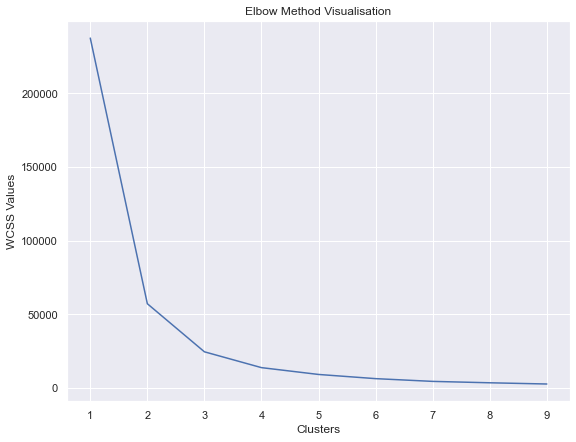

In [21]:
from sklearn.cluster import KMeans
import statistics as st
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(X_train)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(9,7))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

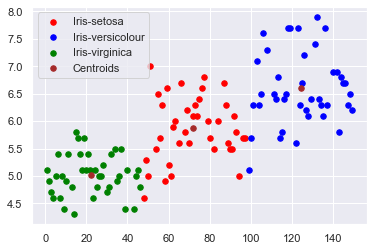

In [22]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)


plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'brown', label = 'Centroids')
plt.legend()

Text(0.5, 1.0, 'Predicted')

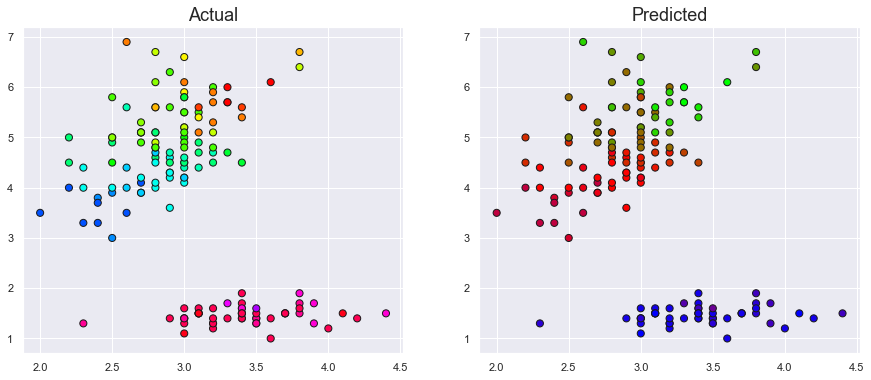

In [23]:
new_labels=km.labels_
fig,axes=plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,2],X[:,3],c=y,cmap='hsv_r',edgecolor='k',s=50)
axes[1].scatter(X[:,2],X[:,3],c=y,cmap='brg',edgecolor='k',s=50)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)